In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStaticDetection, nets
from NEATModels.Staticconfig  import StaticNeatConfig
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
NpzDirectory = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2OVoloneatV0/'
TrainModelName = 'Yolov0oneat.npz'
ValidationModelName = 'Yolov0oneatVal.npz'


ModelDir = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/'
#Model name based on wether it is residual or sequntial ONEAT network
Model_Name = 'ResidualBin2NeatModel.h5'
StaticCategoriesJson = ModelDir + 'StaticCategories.json'
KeyCategories = load_json(StaticCategoriesJson)

StaticCordJson = ModelDir + 'StaticCord.json'
KeyCord = load_json(StaticCordJson)

#Neural network parameters
#For ORNET use residual = True and for OSNET use residual = False
#Neural network parameters
#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 32
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 29


#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-4
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yoloV0 = True
ImageX = 54
ImageY = 54
#Training epochs, longer the better with proper chosen learning rate
epochs = 250




In [3]:
config = StaticNeatConfig(residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, gridX = 1, gridY = 1, ImageX = ImageX, ImageY = ImageY, nboxes = 1, 
                         epochs = epochs, categories = len(KeyCategories), box_vector = len(KeyCord), learning_rate = learning_rate,
                         batch_size = batch_size, ModelName = Model_Name, multievent = multievent)

config_json = config.to_json()
show = True
print(config)
save_json(config_json, ModelDir + Model_Name + '_Parameter.json')

StaticNeatConfig(ImageX=54, ImageY=54, ModelName='ResidualBin2NeatModel.h5', batch_size=100, box_vector=4, categories=4, depth=29, epochs=250, gridX=1, gridY=1, learning_rate=0.0001, mid_kernel=3, multievent=False, nboxes=1, residual=True, start_kernel=3, startfilter=32)


number of  images:	 27496
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
number of  images:	 1448
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
loading weights














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
_____________________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 27496 samples, validate on 1448 samples
Epoch 1/250
27496/27496 [==============================] - 44s 2ms/step - loss: 1.2739 - acc: 0.9970 - val_loss: 1.9385 - val_acc: 0.9655

Epoch 00001: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ResidualBin2NeatModel.h5
{'val_loss': 1.9384915831997909, 'val_acc': 0.9654696154001668, 'loss': 1.2738893350647533, 'acc': 0.9969813819884699, 'lr': 1e-04}


<Figure size 432x288 with 0 Axes>

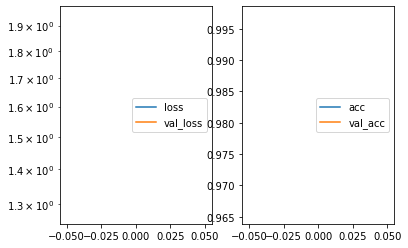

[[1.0812577e-06]] Normal
[[3.4850883e-15]] MacroCheate
[[0.9999888]] NonMatureP1
[[1.0075717e-05]] MatureP1
[[2.530762e-07]] Normal
[[8.4217015e-07]] MacroCheate
[[1.798566e-05]] NonMatureP1
[[0.9999809]] MatureP1
[[7.7565615e-05]] Normal
[[5.4451093e-08]] MacroCheate
[[0.00604079]] NonMatureP1
[[0.9938816]] MatureP1
[[1.0858185e-05]] Normal
[[2.7599925e-16]] MacroCheate
[[0.9999888]] NonMatureP1
[[3.4294388e-07]] MatureP1
[[3.4873608e-06]] Normal
[[3.5885275e-10]] MacroCheate
[[0.00081746]] NonMatureP1
[[0.99917907]] MatureP1
[[2.1372558e-07]] Normal
[[3.4744808e-06]] MacroCheate
[[4.8944e-06]] NonMatureP1
[[0.9999914]] MatureP1
[[9.0693036e-11]] Normal
[[0.9985385]] MacroCheate
[[1.5660654e-12]] NonMatureP1
[[0.00146156]] MatureP1
[[7.2355415e-06]] Normal
[[9.927095e-09]] MacroCheate
[[0.11385626]] NonMatureP1
[[0.8861365]] MatureP1
[[2.5634044e-13]] Normal
[[0.9999976]] MacroCheate
[[1.0424448e-18]] NonMatureP1
[[2.3590846e-06]] MatureP1
[[5.7260614e-09]] Normal
[[0.9999459]] MacroC

[[0.01178692]] NonMatureP1
[[0.9881896]] MatureP1
[[0.00689717]] Normal
[[0.00021623]] MacroCheate
[[0.00193401]] NonMatureP1
[[0.9909526]] MatureP1
[[9.7015274e-08]] Normal
[[2.2522852e-07]] MacroCheate
[[7.15483e-06]] NonMatureP1
[[0.9999925]] MatureP1
[[5.2731566e-13]] Normal
[[1.]] MacroCheate
[[1.9251646e-20]] NonMatureP1
[[2.3543054e-10]] MatureP1
[[0.00053464]] Normal
[[0.99946505]] MacroCheate
[[2.3990083e-07]] NonMatureP1
[[1.15923854e-07]] MatureP1
[[0.00094452]] Normal
[[1.675035e-12]] MacroCheate
[[0.99292374]] NonMatureP1
[[0.00613176]] MatureP1
[[4.246697e-07]] Normal
[[6.5024635e-09]] MacroCheate
[[5.2211203e-07]] NonMatureP1
[[0.99999905]] MatureP1
[[1.127854e-05]] Normal
[[3.838232e-09]] MacroCheate
[[0.00032816]] NonMatureP1
[[0.9996605]] MatureP1
[[0.0005097]] Normal
[[0.8472862]] MacroCheate
[[0.00032898]] NonMatureP1
[[0.15187517]] MatureP1
[[3.4373684e-07]] Normal
[[4.4705445e-07]] MacroCheate
[[6.081799e-08]] NonMatureP1
[[0.99999905]] MatureP1
[[4.8718455e-12]] 

[[1.3227653e-06]] MatureP1
[[5.127721e-07]] Normal
[[2.1634266e-08]] MacroCheate
[[5.9219357e-05]] NonMatureP1
[[0.9999403]] MatureP1
[[7.454957e-08]] Normal
[[5.215511e-07]] MacroCheate
[[6.40977e-07]] NonMatureP1
[[0.9999988]] MatureP1
[[1.3422142e-07]] Normal
[[4.6825636e-07]] MacroCheate
[[1.4987332e-08]] NonMatureP1
[[0.9999994]] MatureP1
[[3.5019014e-09]] Normal
[[2.406178e-06]] MacroCheate
[[2.203837e-09]] NonMatureP1
[[0.9999976]] MatureP1
[[0.15563695]] Normal
[[1.3824876e-08]] MacroCheate
[[0.8430373]] NonMatureP1
[[0.00132581]] MatureP1
[[2.6173813e-05]] Normal
[[2.994791e-14]] MacroCheate
[[0.9999577]] NonMatureP1
[[1.6072314e-05]] MatureP1
[[1.6662382e-06]] Normal
[[1.2705432e-06]] MacroCheate
[[1.8226474e-06]] NonMatureP1
[[0.99999523]] MatureP1
[[4.922354e-07]] Normal
[[2.6526794e-07]] MacroCheate
[[8.442601e-06]] NonMatureP1
[[0.9999908]] MatureP1
[[2.504071e-07]] Normal
[[4.1912305e-09]] MacroCheate
[[0.00015196]] NonMatureP1
[[0.99984777]] MatureP1
[[0.00015761]] Norm

[[2.310488e-09]] Normal
[[1.]] MacroCheate
[[5.508967e-11]] NonMatureP1
[[2.3417588e-08]] MatureP1
[[6.649133e-08]] Normal
[[0.99963903]] MacroCheate
[[2.1233664e-09]] NonMatureP1
[[0.00036079]] MatureP1
[[1.7898549e-07]] Normal
[[5.4246332e-08]] MacroCheate
[[1.6018053e-06]] NonMatureP1
[[0.9999982]] MatureP1
[[1.6406997e-06]] Normal
[[4.278777e-14]] MacroCheate
[[0.9999734]] NonMatureP1
[[2.4857758e-05]] MatureP1
[[6.059121e-08]] Normal
[[0.9999999]] MacroCheate
[[5.8517725e-11]] NonMatureP1
[[2.5669344e-08]] MatureP1
[[1.0467568e-06]] Normal
[[3.7554303e-11]] MacroCheate
[[1.173514e-05]] NonMatureP1
[[0.99998724]] MatureP1
[[4.346087e-07]] Normal
[[3.1739962e-09]] MacroCheate
[[0.9998981]] NonMatureP1
[[0.00010143]] MatureP1
[[2.5604173e-15]] Normal
[[1.]] MacroCheate
[[1.0412742e-19]] NonMatureP1
[[5.3916025e-12]] MatureP1
[[1.6940222e-11]] Normal
[[0.9999964]] MacroCheate
[[6.9334607e-16]] NonMatureP1
[[3.5832797e-06]] MatureP1
[[5.6744994e-08]] Normal
[[1.5033928e-07]] MacroCheat

[[2.9511007e-08]] MacroCheate
[[1.6402364e-05]] NonMatureP1
[[0.9999832]] MatureP1
[[7.348787e-06]] Normal
[[0.00013637]] MacroCheate
[[2.615189e-07]] NonMatureP1
[[0.999856]] MatureP1
[[9.090575e-07]] Normal
[[5.3458003e-13]] MacroCheate
[[0.9999988]] NonMatureP1
[[2.4494383e-07]] MatureP1
[[1.6653148e-05]] Normal
[[9.541907e-06]] MacroCheate
[[1.1730493e-05]] NonMatureP1
[[0.9999621]] MatureP1
[[9.494061e-06]] Normal
[[5.870118e-09]] MacroCheate
[[0.00349677]] NonMatureP1
[[0.99649376]] MatureP1
[[3.732297e-08]] Normal
[[1.3407897e-07]] MacroCheate
[[2.2452147e-08]] NonMatureP1
[[0.9999999]] MatureP1
[[4.0056364e-08]] Normal
[[8.924287e-10]] MacroCheate
[[2.1449994e-06]] NonMatureP1
[[0.99999785]] MatureP1
[[5.2056092e-11]] Normal
[[0.9999964]] MacroCheate
[[4.3982368e-18]] NonMatureP1
[[3.5499463e-06]] MatureP1
[[0.00032908]] Normal
[[1.9994955e-09]] MacroCheate
[[0.9988445]] NonMatureP1
[[0.00082638]] MatureP1
[[3.4656807e-08]] Normal
[[0.99984074]] MacroCheate
[[3.4438368e-12]] No

[[0.9999999]] MatureP1
[[2.8217455e-05]] Normal
[[0.00022773]] MacroCheate
[[7.2127026e-05]] NonMatureP1
[[0.99967194]] MatureP1
[[3.1166812e-07]] Normal
[[3.4846204e-07]] MacroCheate
[[8.672185e-06]] NonMatureP1
[[0.9999906]] MatureP1
[[3.7450456e-11]] Normal
[[0.99999344]] MacroCheate
[[2.7848297e-14]] NonMatureP1
[[6.53669e-06]] MatureP1
[[0.00021679]] Normal
[[1.4921077e-06]] MacroCheate
[[0.13651645]] NonMatureP1
[[0.86326534]] MatureP1
[[4.637496e-07]] Normal
[[7.676146e-08]] MacroCheate
[[9.4777615e-06]] NonMatureP1
[[0.99998987]] MatureP1
[[1.4868273e-06]] Normal
[[8.328488e-14]] MacroCheate
[[0.99999154]] NonMatureP1
[[7.069916e-06]] MatureP1
[[1.7740263e-06]] Normal
[[1.428601e-09]] MacroCheate
[[7.525389e-05]] NonMatureP1
[[0.999923]] MatureP1
[[1.1957843e-10]] Normal
[[0.999982]] MacroCheate
[[3.4013852e-16]] NonMatureP1
[[1.7960294e-05]] MatureP1
[[2.6273372e-07]] Normal
[[8.981002e-12]] MacroCheate
[[1.4454386e-07]] NonMatureP1
[[0.99999964]] MatureP1
[[1.0071111e-07]] No

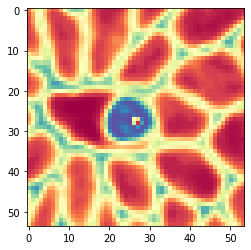

Epoch 2/250
27496/27496 [==============================] - 36s 1ms/step - loss: 1.2486 - acc: 0.9983 - val_loss: 2.2687 - val_acc: 0.9372

Epoch 00002: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ResidualBin2NeatModel.h5
{'val_loss': 2.2687027661839902, 'val_acc': 0.9371546964619041, 'loss': 1.2485869557038274, 'acc': 0.9982542931981513, 'lr': 1e-04}


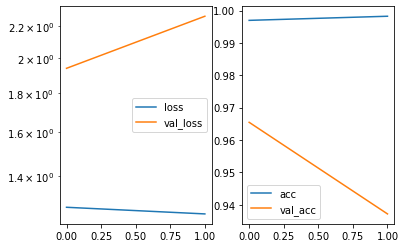

[[3.2252667e-06]] Normal
[[2.8223546e-14]] MacroCheate
[[0.9999963]] NonMatureP1
[[4.770576e-07]] MatureP1
[[3.0269657e-06]] Normal
[[0.00266154]] MacroCheate
[[0.00056052]] NonMatureP1
[[0.996775]] MatureP1
[[0.00292913]] Normal
[[5.609234e-07]] MacroCheate
[[0.61448205]] NonMatureP1
[[0.38258827]] MatureP1
[[3.065147e-05]] Normal
[[1.4103592e-13]] MacroCheate
[[0.99996936]] NonMatureP1
[[2.0120391e-10]] MatureP1
[[0.00012465]] Normal
[[1.1958176e-07]] MacroCheate
[[0.00736318]] NonMatureP1
[[0.992512]] MatureP1
[[5.381541e-05]] Normal
[[0.14341643]] MacroCheate
[[0.00015712]] NonMatureP1
[[0.8563726]] MatureP1
[[7.075147e-16]] Normal
[[1.]] MacroCheate
[[1.4249915e-19]] NonMatureP1
[[3.39356e-12]] MatureP1
[[0.00065494]] Normal
[[0.916715]] MacroCheate
[[0.0767544]] NonMatureP1
[[0.00587561]] MatureP1
[[2.0398675e-19]] Normal
[[1.]] MacroCheate
[[4.161429e-28]] NonMatureP1
[[1.9682701e-14]] MatureP1
[[3.8025867e-12]] Normal
[[1.]] MacroCheate
[[2.4691862e-15]] NonMatureP1
[[3.3095469

[[1.]] MacroCheate
[[4.583724e-20]] NonMatureP1
[[2.3139004e-25]] MatureP1
[[0.00171881]] Normal
[[6.209819e-13]] MacroCheate
[[0.9977108]] NonMatureP1
[[0.00057044]] MatureP1
[[2.4386354e-05]] Normal
[[3.3808058e-07]] MacroCheate
[[8.038435e-05]] NonMatureP1
[[0.999895]] MatureP1
[[0.00138381]] Normal
[[1.4332265e-05]] MacroCheate
[[0.06190067]] NonMatureP1
[[0.9367012]] MatureP1
[[5.381403e-06]] Normal
[[0.9998772]] MacroCheate
[[2.2918996e-06]] NonMatureP1
[[0.00011507]] MatureP1
[[4.8444366e-05]] Normal
[[0.02039407]] MacroCheate
[[3.708364e-08]] NonMatureP1
[[0.97955745]] MatureP1
[[9.510032e-20]] Normal
[[1.]] MacroCheate
[[1.16251844e-23]] NonMatureP1
[[3.3470001e-16]] MatureP1
[[0.00485967]] Normal
[[7.794415e-05]] MacroCheate
[[3.722259e-05]] NonMatureP1
[[0.9950251]] MatureP1
[[1.6266567e-05]] Normal
[[0.00143454]] MacroCheate
[[5.4029346e-07]] NonMatureP1
[[0.99854857]] MatureP1
[[1.2442021e-13]] Normal
[[0.999997]] MacroCheate
[[6.139223e-15]] NonMatureP1
[[2.9234407e-06]] 

[[5.739474e-08]] MatureP1
[[1.4080823e-07]] Normal
[[4.7406536e-07]] MacroCheate
[[8.590422e-07]] NonMatureP1
[[0.99999857]] MatureP1
[[0.00015885]] Normal
[[0.00070626]] MacroCheate
[[0.2171944]] NonMatureP1
[[0.78194046]] MatureP1
[[0.0057617]] Normal
[[0.00632956]] MacroCheate
[[7.8597914e-05]] NonMatureP1
[[0.9878302]] MatureP1
[[1.6302264e-17]] Normal
[[1.]] MacroCheate
[[1.379666e-24]] NonMatureP1
[[5.1098986e-23]] MatureP1
[[0.04843985]] Normal
[[5.5397817e-07]] MacroCheate
[[0.9515592]] NonMatureP1
[[4.3969084e-07]] MatureP1
[[9.682956e-06]] Normal
[[5.3501444e-12]] MacroCheate
[[0.99999034]] NonMatureP1
[[4.3022716e-10]] MatureP1
[[7.6019635e-10]] Normal
[[0.9999999]] MacroCheate
[[3.031823e-13]] NonMatureP1
[[1.56383e-07]] MatureP1
[[2.6158412e-08]] Normal
[[1.]] MacroCheate
[[5.5828e-11]] NonMatureP1
[[1.4309091e-09]] MatureP1
[[1.1678668e-21]] Normal
[[1.]] MacroCheate
[[8.810582e-29]] NonMatureP1
[[6.9638015e-26]] MatureP1
[[5.742539e-16]] Normal
[[1.]] MacroCheate
[[1.989

[[0.00050952]] MacroCheate
[[5.0301883e-06]] NonMatureP1
[[0.9994042]] MatureP1
[[0.00014277]] Normal
[[0.27724838]] MacroCheate
[[0.00019732]] NonMatureP1
[[0.7224115]] MatureP1
[[0.10132361]] Normal
[[0.67727363]] MacroCheate
[[0.00803266]] NonMatureP1
[[0.21337008]] MatureP1
[[2.1084339e-14]] Normal
[[1.]] MacroCheate
[[4.7312082e-14]] NonMatureP1
[[9.990946e-12]] MatureP1
[[5.1619315e-07]] Normal
[[3.7963022e-07]] MacroCheate
[[1.1452121e-05]] NonMatureP1
[[0.9999876]] MatureP1
[[0.00138996]] Normal
[[3.4789885e-08]] MacroCheate
[[0.01214966]] NonMatureP1
[[0.9864603]] MatureP1
[[7.778317e-05]] Normal
[[0.23135988]] MacroCheate
[[7.870357e-07]] NonMatureP1
[[0.76856154]] MatureP1
[[1.2739214e-11]] Normal
[[1.]] MacroCheate
[[9.4110506e-18]] NonMatureP1
[[4.397218e-08]] MatureP1
[[0.00152073]] Normal
[[4.6221998e-05]] MacroCheate
[[0.00641291]] NonMatureP1
[[0.9920202]] MatureP1
[[1.7034153e-14]] Normal
[[1.]] MacroCheate
[[1.6525055e-15]] NonMatureP1
[[8.150108e-09]] MatureP1
[[2.7

[[3.8768676e-12]] MacroCheate
[[0.9996984]] NonMatureP1
[[2.7589167e-09]] MatureP1
[[9.283718e-06]] Normal
[[0.00011422]] MacroCheate
[[1.5611843e-07]] NonMatureP1
[[0.9998764]] MatureP1
[[2.6294721e-05]] Normal
[[8.561918e-05]] MacroCheate
[[3.1386048e-07]] NonMatureP1
[[0.9998877]] MatureP1
[[3.1459281e-18]] Normal
[[1.]] MacroCheate
[[2.3306382e-22]] NonMatureP1
[[8.881122e-18]] MatureP1
[[1.1176116e-11]] Normal
[[0.99999917]] MacroCheate
[[1.5521728e-20]] NonMatureP1
[[8.341252e-07]] MatureP1
[[0.03827281]] Normal
[[0.17206599]] MacroCheate
[[0.01473744]] NonMatureP1
[[0.7749238]] MatureP1
[[1.2554864e-09]] Normal
[[1.]] MacroCheate
[[8.905965e-16]] NonMatureP1
[[2.3974497e-10]] MatureP1
[[9.702046e-19]] Normal
[[1.]] MacroCheate
[[7.3741266e-24]] NonMatureP1
[[3.256574e-22]] MatureP1
[[3.4486263e-07]] Normal
[[5.6836575e-06]] MacroCheate
[[2.8972986e-09]] NonMatureP1
[[0.9999939]] MatureP1
[[0.00022592]] Normal
[[0.04895192]] MacroCheate
[[4.010538e-07]] NonMatureP1
[[0.95082164]]

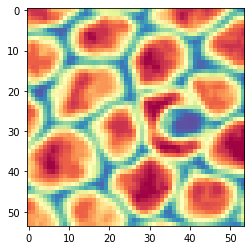

Epoch 3/250
27496/27496 [==============================] - 35s 1ms/step - loss: 1.2891 - acc: 0.9951 - val_loss: 1.7057 - val_acc: 0.9724

Epoch 00003: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ResidualBin2NeatModel.h5
{'val_loss': 1.7057393081280408, 'val_acc': 0.9723756902784274, 'loss': 1.2891038575247342, 'acc': 0.9950901991862491, 'lr': 1e-04}


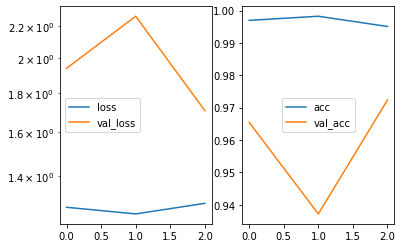

[[7.34775e-06]] Normal
[[5.1439274e-14]] MacroCheate
[[0.9999571]] NonMatureP1
[[3.557824e-05]] MatureP1
[[4.1570453e-07]] Normal
[[1.2271345e-06]] MacroCheate
[[1.7787172e-05]] NonMatureP1
[[0.99998057]] MatureP1
[[9.77891e-05]] Normal
[[5.615665e-08]] MacroCheate
[[0.0055803]] NonMatureP1
[[0.99432194]] MatureP1
[[0.00063685]] Normal
[[3.2294337e-14]] MacroCheate
[[0.99935573]] NonMatureP1
[[7.3423785e-06]] MatureP1
[[8.56864e-06]] Normal
[[1.2532934e-09]] MacroCheate
[[0.00083531]] NonMatureP1
[[0.9991561]] MatureP1
[[5.6306267e-06]] Normal
[[1.2015039e-05]] MacroCheate
[[7.1805653e-06]] NonMatureP1
[[0.9999752]] MatureP1
[[1.3605037e-10]] Normal
[[0.99996066]] MacroCheate
[[3.1639203e-12]] NonMatureP1
[[3.9396164e-05]] MatureP1
[[0.00219462]] Normal
[[8.559444e-05]] MacroCheate
[[0.60276306]] NonMatureP1
[[0.39495668]] MatureP1
[[6.3024976e-13]] Normal
[[0.9999988]] MacroCheate
[[1.2357554e-18]] NonMatureP1
[[1.2433001e-06]] MatureP1
[[1.3529585e-07]] Normal
[[0.9999348]] MacroChea

[[1.4668552e-05]] Normal
[[0.00545427]] MacroCheate
[[2.7362676e-05]] NonMatureP1
[[0.99450374]] MatureP1
[[2.0517993e-05]] Normal
[[3.2672853e-07]] MacroCheate
[[9.42964e-05]] NonMatureP1
[[0.99988484]] MatureP1
[[9.599646e-07]] Normal
[[1.1027455e-07]] MacroCheate
[[0.00032544]] NonMatureP1
[[0.9996735]] MatureP1
[[6.995923e-09]] Normal
[[0.99998915]] MacroCheate
[[1.0729173e-12]] NonMatureP1
[[1.0846733e-05]] MatureP1
[[3.8033297e-14]] Normal
[[1.]] MacroCheate
[[1.7099557e-17]] NonMatureP1
[[2.3697334e-08]] MatureP1
[[0.00043812]] Normal
[[4.023058e-08]] MacroCheate
[[0.00226408]] NonMatureP1
[[0.9972977]] MatureP1
[[8.140706e-07]] Normal
[[1.1272648e-10]] MacroCheate
[[5.0260206e-07]] NonMatureP1
[[0.9999987]] MatureP1
[[5.494742e-05]] Normal
[[0.00012411]] MacroCheate
[[3.192864e-05]] NonMatureP1
[[0.99978906]] MatureP1
[[5.951032e-06]] Normal
[[5.196042e-07]] MacroCheate
[[0.00059867]] NonMatureP1
[[0.9993949]] MatureP1
[[0.2172577]] Normal
[[0.01327588]] MacroCheate
[[0.0095545

[[0.99475795]] NonMatureP1
[[0.0002408]] MatureP1
[[1.7134066e-06]] Normal
[[6.56549e-14]] MacroCheate
[[0.9999982]] NonMatureP1
[[1.139447e-07]] MatureP1
[[1.2869402e-08]] Normal
[[0.9999981]] MacroCheate
[[1.6814642e-11]] NonMatureP1
[[1.914528e-06]] MatureP1
[[1.525753e-05]] Normal
[[0.9998031]] MacroCheate
[[1.8179604e-07]] NonMatureP1
[[0.00018148]] MatureP1
[[1.4770822e-10]] Normal
[[1.]] MacroCheate
[[6.5716806e-13]] NonMatureP1
[[7.320247e-12]] MatureP1
[[4.989951e-10]] Normal
[[0.9999999]] MacroCheate
[[1.1966299e-13]] NonMatureP1
[[9.835393e-08]] MatureP1
[[2.965463e-13]] Normal
[[0.99999595]] MacroCheate
[[5.750432e-15]] NonMatureP1
[[4.036237e-06]] MatureP1
[[8.622766e-09]] Normal
[[6.538186e-06]] MacroCheate
[[5.653435e-10]] NonMatureP1
[[0.99999344]] MatureP1
[[1.257616e-06]] Normal
[[7.766914e-11]] MacroCheate
[[1.0563065e-06]] NonMatureP1
[[0.9999976]] MatureP1
[[3.1839493e-06]] Normal
[[0.9999957]] MacroCheate
[[2.2591859e-10]] NonMatureP1
[[1.1190717e-06]] MatureP1
[[

[[3.4568127e-06]] MacroCheate
[[1.6998314e-08]] NonMatureP1
[[0.9999964]] MatureP1
[[8.28169e-06]] Normal
[[4.560062e-09]] MacroCheate
[[3.8650273e-06]] NonMatureP1
[[0.99998784]] MatureP1
[[0.00078733]] Normal
[[2.0303627e-08]] MacroCheate
[[0.9933929]] NonMatureP1
[[0.0058197]] MatureP1
[[6.098632e-08]] Normal
[[0.98617977]] MacroCheate
[[3.5124081e-10]] NonMatureP1
[[0.01382011]] MatureP1
[[1.858085e-08]] Normal
[[0.99999976]] MacroCheate
[[5.6100334e-13]] NonMatureP1
[[2.0622072e-07]] MatureP1
[[1.2519008e-07]] Normal
[[1.3033796e-05]] MacroCheate
[[6.131461e-05]] NonMatureP1
[[0.9999256]] MatureP1
[[7.7075485e-11]] Normal
[[1.]] MacroCheate
[[2.1851258e-15]] NonMatureP1
[[3.971184e-08]] MatureP1
[[5.4059805e-11]] Normal
[[1.]] MacroCheate
[[9.234189e-13]] NonMatureP1
[[1.6863831e-09]] MatureP1
[[1.8454166e-05]] Normal
[[6.7915986e-05]] MacroCheate
[[8.3255276e-07]] NonMatureP1
[[0.99991274]] MatureP1
[[9.108614e-07]] Normal
[[1.8391064e-06]] MacroCheate
[[5.4321677e-06]] NonMature

[[1.2015968e-06]] Normal
[[1.1298963e-06]] MacroCheate
[[1.1096478e-09]] NonMatureP1
[[0.9999976]] MatureP1
[[1.4918246e-10]] Normal
[[0.99999964]] MacroCheate
[[9.52399e-16]] NonMatureP1
[[3.835044e-07]] MatureP1
[[0.0047435]] Normal
[[3.1608113e-07]] MacroCheate
[[0.9952479]] NonMatureP1
[[8.30016e-06]] MatureP1
[[6.348212e-11]] Normal
[[1.]] MacroCheate
[[4.80302e-14]] NonMatureP1
[[2.1731507e-08]] MatureP1
[[4.16571e-08]] Normal
[[2.572289e-09]] MacroCheate
[[5.1550916e-07]] NonMatureP1
[[0.9999995]] MatureP1
[[0.0002758]] Normal
[[0.00023798]] MacroCheate
[[8.739992e-05]] NonMatureP1
[[0.9993987]] MatureP1
[[2.9966044e-05]] Normal
[[2.0382213e-06]] MacroCheate
[[0.00205852]] NonMatureP1
[[0.9979095]] MatureP1
[[0.00032464]] Normal
[[2.4020412e-06]] MacroCheate
[[0.15274164]] NonMatureP1
[[0.8469314]] MatureP1
[[1.165825e-10]] Normal
[[0.99999356]] MacroCheate
[[3.4008712e-13]] NonMatureP1
[[6.4918977e-06]] MatureP1
[[5.4906656e-12]] Normal
[[0.9999993]] MacroCheate
[[3.936682e-14]

[[2.0916148e-06]] MacroCheate
[[4.9525475e-05]] NonMatureP1
[[0.9999386]] MatureP1
[[2.710545e-09]] Normal
[[1.]] MacroCheate
[[2.8830435e-13]] NonMatureP1
[[3.6836663e-09]] MatureP1
[[0.0005903]] Normal
[[9.8365326e-14]] MacroCheate
[[0.9984909]] NonMatureP1
[[0.00091884]] MatureP1
[[6.636497e-07]] Normal
[[0.00062737]] MacroCheate
[[6.686898e-10]] NonMatureP1
[[0.99937195]] MatureP1
[[5.621925e-07]] Normal
[[1.1603645e-05]] MacroCheate
[[4.388124e-07]] NonMatureP1
[[0.99998736]] MatureP1
[[4.917171e-10]] Normal
[[0.9998715]] MacroCheate
[[8.263278e-15]] NonMatureP1
[[0.00012852]] MatureP1
[[0.00171595]] Normal
[[2.0714859e-07]] MacroCheate
[[0.83897364]] NonMatureP1
[[0.15931018]] MatureP1
[[2.6035774e-11]] Normal
[[1.]] MacroCheate
[[7.344626e-15]] NonMatureP1
[[3.7141654e-09]] MatureP1
[[3.5424268e-12]] Normal
[[1.]] MacroCheate
[[3.3684823e-15]] NonMatureP1
[[1.7793292e-08]] MatureP1
[[0.00046657]] Normal
[[1.2767659e-07]] MacroCheate
[[0.24370064]] NonMatureP1
[[0.7558326]] Matur

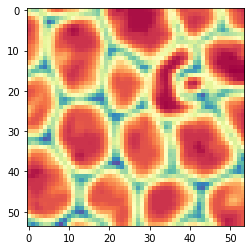

Epoch 4/250
  300/27496 [..............................] - ETA: 35s - loss: 1.2195 - acc: 1.0000

KeyboardInterrupt: 

In [4]:
Train = NEATStaticDetection(config, NpzDirectory,KeyCategories, KeyCord,TrainModelName,ValidationModelName, ModelDir, Model_Name, show = show, yoloV0 = yoloV0)

Train.loadData()

Train.TrainModel()
